# **ENLAZAR GOOGLE COLAB CON GOOGLE DRIVE**

Los archivos necesarios se encuentran en una ubicación de Google Drive, por lo que es necesario montar esta unidad en Google Colab.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **IMPORTAR LIBRERÍAS PYTHON**

In [ ]:
import io
import wave
import numpy as np
import matplotlib.pyplot as plt
import math

Se apunta a las rutas con las que se va a trabajar, en este caso se crean dos de ellas: una para acceder a los archivos WAV y otra para guardar los archivos con muestras IQ de sólo señal (filtrando el ruido).

In [ ]:
wav_path = "/content/drive/MyDrive/Datasets/ArchivosWAV"
partial_files = "/content/drive/MyDrive/Datasets/LoRa/SignalFiles"

# **CARGA DE ARCHIVOS DE GRABACIÓN DE SEÑALES LoRa**

Los archivos son cargados en variables, una para cada Spreading Factor de LoRa. Los archivos WAV contienen muestras IQ de cada SF, mismas que fueron grabadas durante un minuto.

In [ ]:
# Cargar archivos wav desde su ubicación en Colab

wav_fileSF7 = wave.open(wav_path + '/SF7-Lime_2023-11-27T20_29_52_870.wav','r')
wav_fileSF8 = wave.open(wav_path + '/SF8-Lime_2023-11-27T20_25_41_693.wav','r')
wav_fileSF9 = wave.open(wav_path + '/SF9-Lime_2023-11-27T20_21_53_758.wav','r')
wav_fileSF10 = wave.open(wav_path + '/SF10-Lime_2023-11-27T20_16_30_999.wav','r')
wav_fileSF11 = wave.open(wav_path + '/SF11-Lime_2023-11-27T20_12_15_535.wav','r')
wav_fileSF12 = wave.open(wav_path + '/SF12-Lime_2023-11-27T20_06_04_340.wav','r')

# **METADATOS DE LOS ARCHIVOS WAV**

Se obtiene esta información para conocer las características de los archivos WAV leídos, que incluyen el número de canales, ancho de muestra, número de frames y la tasa de muestreo a la cual se realizó la captura de señal. Se elige una de las variables como ejemplo; sin embargo, para todas se cumplen las mismas condiciones.

In [ ]:
# Obtener número de canales y anchura de sample (común para todos)
num_channels = wav_fileSF10.getnchannels()
sample_width = wav_fileSF10.getsampwidth()
num_frames = wav_fileSF10.getnframes()  # común para todos
framerate = wav_fileSF10.getframerate() # común para todos

# **LECTURA DE ARCHIVOS WAV Y OBTENCIÓN DE MUESTRAS IQ**

Se analizan cada una de las variables que contienen las muestras de señal (señal + ruido hasta el momento). Se les aplica un formato específico para obtener valores normalizados entre -1 y +1, para luego proceder a separar las muestras I de las muestras Q e irlas almacenando en una matriz de dos columnas.

In [ ]:
# ANALIZAR ARCHIVO WAV SF7
# Leer todos los frames
audio_dataSF7 = wav_fileSF7.readframes(num_frames)
# Convertir a array Numpy
iq_samples_SF7 = np.frombuffer(audio_dataSF7, dtype=np.int16)
iq_samples_SF7 = iq_samples_SF7.astype(np.float32) / 32768
# Separar canales
I_SF7 = iq_samples_SF7[0::2]
Q_SF7 = iq_samples_SF7[1::2]
# Unir muestras IQ en matriz de 2 columnas
iq_matrix_SF7 = np.column_stack((I_SF7, Q_SF7))
# Mostrar matriz resultante
print(num_frames)
print("canales", num_channels)
print(sample_width)
print(framerate)
print(iq_samples_SF7)
wav_fileSF7.close()



63127552
canales 2
2
1000000
[-4.2724609e-04  6.1035156e-05  2.1362305e-04 ... -1.1291504e-03
  3.0517578e-04 -8.2397461e-04]


 (Opcional) Se puede graficar cualquiera de las señales con Matlplotlib para visualizar que en realidad se están representando los valores de señal.

/usr/local/lib/python3.10/dist-packages/scipy/signal/_spectral_py.py:1870: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '


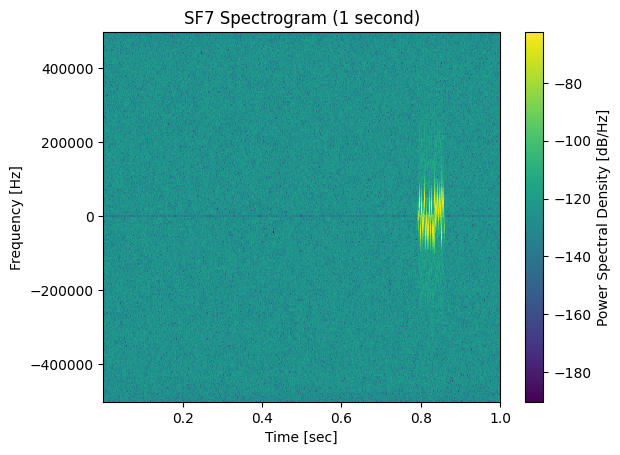

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import spectrogram

# Definir función para graficar espectrograma
def plot_spectrogram(signal, sf, title):
    f, t, Sxx = spectrogram(signal[:, 0] + 1j * signal[:, 1], fs=sf, nperseg=256, noverlap=128)
    t_one_second = np.where(t <= 1)[0]  # Obtener índices hasta 1 segundo

    # Aplicar fftshift para centrar la representación del espectrograma
    Sxx_shifted = np.fft.fftshift(Sxx, axes=0)
    f_shifted = np.fft.fftshift(f)

    plt.pcolormesh(t[t_one_second], f_shifted, 10 * np.log10(Sxx_shifted[:, t_one_second]))
    plt.title(title)
    plt.ylabel('Frequency [Hz]')
    plt.xlabel('Time [sec]')
    plt.colorbar(label='Power Spectral Density [dB/Hz]')
    plt.show()

# Especificar la frecuencia de muestreo (puedes ajustarla según tu archivo)
sf_SF7 = framerate

# Graficar espectrograma de 1 segundo para iq_matrix_SF7
title_SF7 = "SF7 Spectrogram (1 second)"
plot_spectrogram(iq_matrix_SF7, sf_SF7, title_SF7)



In [ ]:
# ANALIZAR ARCHIVO WAV SF8
# Leer todos los frames
audio_dataSF8 = wav_fileSF8.readframes(num_frames)
# Convertir a array Numpy
iq_samples_SF8 = np.frombuffer(audio_dataSF8, dtype=np.int16)
iq_samples_SF8 = iq_samples_SF8.astype(np.float32) / 32768
# Separar canales
I_SF8 = iq_samples_SF8[0::2]
Q_SF8 = iq_samples_SF8[1::2]
# Unir muestras IQ en matriz de 2 columnas
iq_matrix_SF8 = np.column_stack((I_SF8, Q_SF8))
# Mostrar matriz resultante
print(num_frames)
print("canales", num_channels)
print(sample_width)
print(framerate)
print(iq_samples_SF8)
wav_fileSF8.close()

63127552
canales 2
2
1000000
[-0.00039673  0.00036621  0.00012207 ... -0.00082397 -0.00030518
  0.00045776]


In [ ]:
# ANALIZAR ARCHIVO WAV SF9
# Leer todos los frames
audio_dataSF9 = wav_fileSF9.readframes(num_frames)
# Convertir a array Numpy
iq_samples_SF9 = np.frombuffer(audio_dataSF9, dtype=np.int16)
iq_samples_SF9 = iq_samples_SF9.astype(np.float32) / 32768
# Separar canales
I_SF9 = iq_samples_SF9[0::2]
Q_SF9 = iq_samples_SF9[1::2]
# Unir muestras IQ en matriz de 2 columnas
iq_matrix_SF9 = np.column_stack((I_SF9, Q_SF9))
# Mostrar matriz resultante
print(num_frames)
print("canales", num_channels)
print(sample_width)
print(framerate)
print(iq_samples_SF9)
wav_fileSF9.close()

63127552
canales 2
2
1000000
[ 8.2397461e-04 -6.8054199e-02 -2.1820068e-02 ... -7.6293945e-04
 -1.2207031e-04  9.1552734e-05]


In [ ]:
# ANALIZAR ARCHIVO WAV SF10
# Leer todos los frames
audio_dataSF10 = wav_fileSF10.readframes(num_frames)
# Convertir a array Numpy
iq_samples_SF10 = np.frombuffer(audio_dataSF10, dtype=np.int16)
iq_samples_SF10 = iq_samples_SF10.astype(np.float32) / 32768
# Separar canales
I_SF10 = iq_samples_SF10[0::2]
Q_SF10 = iq_samples_SF10[1::2]
# Unir muestras IQ en matriz de 2 columnas
iq_matrix_SF10 = np.column_stack((I_SF10, Q_SF10))
# Mostrar matriz resultante
print(num_frames)
print("canales", num_channels)
print(sample_width)
print(framerate)
print(iq_samples_SF10)
wav_fileSF10.close()

63127552
canales 2
2
1000000
[-6.1035156e-05 -2.1362305e-04  5.7983398e-04 ...  4.8583984e-02
 -3.8421631e-02  5.4809570e-02]


In [ ]:
# ANALIZAR ARCHIVO WAV SF11
# Leer todos los frames
audio_dataSF11 = wav_fileSF11.readframes(num_frames)
# Convertir a array Numpy
iq_samples_SF11 = np.frombuffer(audio_dataSF11, dtype=np.int16)
iq_samples_SF11 = iq_samples_SF11.astype(np.float32) / 32768
# Separar canales
I_SF11 = iq_samples_SF11[0::2]
Q_SF11 = iq_samples_SF11[1::2]
# Unir muestras IQ en matriz de 2 columnas
iq_matrix_SF11 = np.column_stack((I_SF11, Q_SF11))
# Mostrar matriz resultante
print(num_frames)
print("canales", num_channels)
print(sample_width)
print(framerate)
print(iq_samples_SF11)
wav_fileSF11.close()

63127552
canales 2
2
1000000
[ 1.8310547e-04 -1.0070801e-03  9.1552734e-05 ... -5.8532715e-02
 -3.5430908e-02 -5.9875488e-02]


In [ ]:
# ANALIZAR ARCHIVO WAV SF12
# Leer todos los frames
audio_dataSF12 = wav_fileSF12.readframes(num_frames)
# Convertir a array Numpy
iq_samples_SF12 = np.frombuffer(audio_dataSF12, dtype=np.int16)
iq_samples_SF12 = iq_samples_SF12.astype(np.float32) / 32768
# Separar canales
I_SF12 = iq_samples_SF12[0::2]
Q_SF12 = iq_samples_SF12[1::2]
# Unir muestras IQ en matriz de 2 columnas
iq_matrix_SF12 = np.column_stack((I_SF12, Q_SF12))
# Mostrar matriz resultante
print(num_frames)
print("canales", num_channels)
print(sample_width)
print(framerate)
print(iq_samples_SF12)
wav_fileSF12.close()

63127552
canales 2
2
1000000
[-0.06021118  0.03381348 -0.06524658 ...  0.06845093  0.01342773
  0.06848145]


# **EXTRAER SOLO SEÑAL**

Se crea una función para extraer los valores de señal y discriminar los valores de ruido producto de los tiempos de silencio establecidos en durante de la transmisión de señales LoRa. Recibe como parámetros la matriz de señal y un valor de umbral, el cual ha sido determinado a partir de visualización de gráficas de sólo valores de ruido. Se va calculando la amplitud de la señal y se va comparando con el umbral mínimo, los valores por encima de este umbral son señal y el resto es ruido. Se obtienen los valores promedio tanto de señal como ruido para calcular la SNR.

In [ ]:
# Función para extraer señal y calcular la SNR
def extract_signal(iq_matrix, threshold):

  signal_samples = []
  amplitudes = []

# Calcula la amplitud de todas las muestras de la matriz IQ
  amplitudes = np.hypot(iq_matrix[:, 0], iq_matrix[:, 1])

    # Filtra las muestras por encima del umbral para obtener la señal
  signal_samples = iq_matrix[amplitudes > threshold]

    # Calcula la potencia de la señal y del ruido
  power_signal = np.mean(amplitudes[amplitudes > threshold]**2)
  power_noise = np.mean(amplitudes[amplitudes <= threshold]**2)

    # Calcula la SNR en decibelios
  snr_db = 10 * np.log10(power_signal / power_noise)

  return np.array(signal_samples), snr_db

Se procede a llamar a la función anterior, mandando como argumento la matriz de muestras IQ y el valor del umbral, y ya que la función retorna dos valores (array de señal filtrada y valor de SNR), se los asigna en nuevas variables. Se aplica para todos los SF.

NOTA: Adicional a esto, se guardan los valores de las muestras filtradas en un archivo .npy con el fin de poder cargarlos desde el almacenamiento y evitar hacer todo el proceso anterior nuevamente.

In [ ]:
# Llama a la función extract_signal y asigna las salidas a una variable
res_signal_samples_SF7 = extract_signal(np.array(iq_matrix_SF7), 0.0025)

# Desempaqueta la tupla y aplica astype(np.float32) a cada elemento
signal_samples_SF7 = res_signal_samples_SF7[0].astype(np.float32)
snr_SF7 = res_signal_samples_SF7[1]
# Convertir a array numpy
signal_samples_SF7 = np.array(signal_samples_SF7)
np.save(partial_files + '/SF7_signal.npy', signal_samples_SF7)
print("muestras solo con valores de señal: ")
print(signal_samples_SF7.shape)
# Eliminar matriz original
del iq_matrix_SF7

muestras solo con valores de señal: 
(3928750, 2)


In [ ]:
print("SNR SF7 (dB): ")
print(snr_SF7)

SNR SF7 (dB): 
38.814899921417236


In [ ]:
# Llama a la función extract_signal y asigna las salidas a una variable
res_signal_samples_SF8 = extract_signal(np.array(iq_matrix_SF8), 0.0025)

# Desempaqueta la tupla y aplica astype(np.float32) a cada elemento
signal_samples_SF8 = res_signal_samples_SF8[0].astype(np.float32)
snr_SF8 = res_signal_samples_SF8[1]
# Convertir a array numpy
signal_samples_SF8 = np.array(signal_samples_SF8)
np.save(partial_files + '/SF8_signal.npy', signal_samples_SF8)
print("muestras solo con valores de señal: ")
print(signal_samples_SF8.shape)
print(signal_samples_SF8)
print("SNR SF8 (dB): ")
print(snr_SF8)
# Eliminar matriz original
del iq_matrix_SF8

muestras solo con valores de señal: 
(6621174, 2)
[[-0.00210571 -0.00137329]
 [-0.00216675 -0.00137329]
 [-0.00231934 -0.00115967]
 ...
 [-0.00228882 -0.00134277]
 [-0.00244141 -0.00088501]
 [-0.00244141 -0.00057983]]
SNR SF8 (dB): 
38.801493644714355


In [ ]:
# Llama a la función extract_signal y asigna las salidas a una variable
res_signal_samples_SF9 = extract_signal(np.array(iq_matrix_SF9), 0.0025)

# Desempaqueta la tupla y aplica astype(np.float32) a cada elemento
signal_samples_SF9 = res_signal_samples_SF9[0].astype(np.float32)
snr_SF9 = res_signal_samples_SF9[1]
# Convertir a array numpy
signal_samples_SF9 = np.array(signal_samples_SF9)
np.save(partial_files + '/SF9_signal.npy', signal_samples_SF9)
print("muestras solo con valores de señal: ")
print(signal_samples_SF9.shape)
print(signal_samples_SF9)
print("SNR SF9 (dB): ")
print(snr_SF9)
# Eliminar matriz original
del iq_matrix_SF9

muestras solo con valores de señal: 
(10907116, 2)
[[ 0.00082397 -0.0680542 ]
 [-0.02182007 -0.06591797]
 [-0.0413208  -0.0557251 ]
 ...
 [-0.00241089  0.00234985]
 [-0.00366211  0.0020752 ]
 [-0.00079346 -0.00244141]]
SNR SF9 (dB): 
38.6996865272522


In [ ]:
# Llama a la función extract_signal y asigna las salidas a una variable
res_signal_samples_SF10 = extract_signal(np.array(iq_matrix_SF10), 0.0025)

# Desempaqueta la tupla y aplica astype(np.float32) a cada elemento
signal_samples_SF10 = res_signal_samples_SF10[0].astype(np.float32)
snr_SF10 = res_signal_samples_SF10[1]
# Convertir a array numpy
signal_samples_SF10 = np.array(signal_samples_SF10)
np.save(partial_files + '/SF10_signal.npy', signal_samples_SF10)
print("muestras solo con valores de señal: ")
print(signal_samples_SF10.shape)
print(signal_samples_SF10)
print("SNR SF10 (dB): ")
print(snr_SF10)
# Eliminar matriz original
del iq_matrix_SF10

muestras solo con valores de señal: 
(17181434, 2)
[[-0.00183105 -0.0017395 ]
 [ 0.0032959   0.00134277]
 [ 0.00338745  0.00241089]
 ...
 [-0.05383301  0.04211426]
 [-0.04656982  0.04858398]
 [-0.03842163  0.05480957]]
SNR SF10 (dB): 
38.69767904281616


In [ ]:
# Llama a la función extract_signal y asigna las salidas a una variable
res_signal_samples_SF11 = extract_signal(np.array(iq_matrix_SF11), 0.0025)

# Desempaqueta la tupla y aplica astype(np.float32) a cada elemento
signal_samples_SF11 = res_signal_samples_SF11[0].astype(np.float32)
snr_SF11 = res_signal_samples_SF11[1]
# Convertir a array numpy
signal_samples_SF11 = np.array(signal_samples_SF11)
np.save(partial_files + '/SF11_signal.npy', signal_samples_SF11)
print("muestras solo con valores de señal: ")
print(signal_samples_SF11.shape)
print(signal_samples_SF11)
print("SNR SF11 (dB): ")
print(snr_SF11)
# Eliminar matriz original
del iq_matrix_SF11

muestras solo con valores de señal: 
(28250736, 2)
[[-0.00253296 -0.00021362]
 [-0.00210571 -0.00183105]
 [-0.00128174 -0.00216675]
 ...
 [-0.03552246 -0.05990601]
 [-0.03591919 -0.05853271]
 [-0.03543091 -0.05987549]]
SNR SF11 (dB): 
38.7838077545166


In [ ]:
# Llama a la función extract_signal y asigna las salidas a una variable
res_signal_samples_SF12 = extract_signal(np.array(iq_matrix_SF12), 0.0025)

# Desempaqueta la tupla y aplica astype(np.float32) a cada elemento
signal_samples_SF12 = res_signal_samples_SF12[0].astype(np.float32)
snr_SF12 = res_signal_samples_SF12[1]
# Convertir a array numpy
signal_samples_SF12 = np.array(signal_samples_SF12)
np.save(partial_files + '/SF12_signal.npy', signal_samples_SF12)
print("muestras solo con valores de señal: ")
print(signal_samples_SF12.shape)
print(signal_samples_SF12)
print("SNR SF12 (dB): ")
print(snr_SF12)
# Eliminar matriz original
del iq_matrix_SF12
# Liberar memoria (opcional)
#gc.collect()

muestras solo con valores de señal: 
(37977459, 2)
[[-0.06021118  0.03381348]
 [-0.06524658  0.02182007]
 [-0.06863403  0.00994873]
 ...
 [-0.02914429  0.06228638]
 [-0.00985718  0.06845093]
 [ 0.01342773  0.06848145]]
SNR SF12 (dB): 
38.61177206039429


(Opcional) Se grafican las muestras de sólo señal para comprobar que no existan picos bajos.

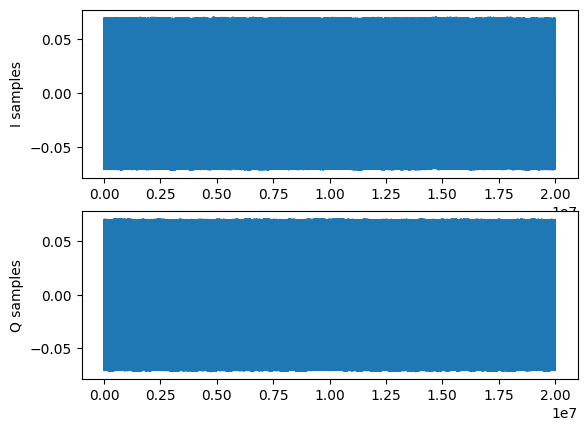

In [ ]:
################################################
#                GRAFICAR SEÑAL                #
################################################

duration = 20 # segundos

# Calcula número de muestras para duración dada
num_samples = math.floor(duration * framerate)

# Toma solo las primeras muestras
iq_subset = signal_samples_SF11[:num_samples]

# Grafica
fig, (ax1, ax2) = plt.subplots(2,1)

ax1.plot(iq_subset[:,0])
ax1.set_ylabel('I samples')

ax2.plot(iq_subset[:,1])
ax2.set_ylabel('Q samples')

plt.show()

## **CARGAR ARCHIVOS CON VALORES DE SÓLO SEÑAL**

In [ ]:
# Cargar los archivos .npy
loaded_signal_samples_SF7 = np.load(partial_files + '/SF7_signal.npy')
loaded_signal_samples_SF8 = np.load(partial_files + '/SF8_signal.npy')
loaded_signal_samples_SF9 = np.load(partial_files + '/SF9_signal.npy')
loaded_signal_samples_SF10 = np.load(partial_files + '/SF10_signal.npy')
loaded_signal_samples_SF11 = np.load(partial_files + '/SF11_signal.npy')
loaded_signal_samples_SF12 = np.load(partial_files + '/SF12_signal.npy')
#print(np.array_equal(signal_samples_SF7, loaded_signal_samples_SF7))

In [ ]:
#Obtener las dimensiones de cada array
print(loaded_signal_samples_SF7.shape) #3928750
print(loaded_signal_samples_SF8.shape) #6621174
print(loaded_signal_samples_SF9.shape) #10907116
print(loaded_signal_samples_SF10.shape)#17181434
print(loaded_signal_samples_SF11.shape)#28250736
print(loaded_signal_samples_SF12.shape)#37977459
# SF7 es el que tiene menos muestras,
# por lo que se truncan todos los arrays al tamaño de SF7
max_length = loaded_signal_samples_SF7.shape[0]

(3928750, 2)
(6621174, 2)
(10907116, 2)
(17181434, 2)
(28250736, 2)
(37977459, 2)


(OPCIONAL) Se puede graficar los espectrogramas de cada una de las matrices SF extraídas, para verificar que en realidad se mustren los valores de sólo señal y se hayan suprimido los silencios de las grabaciones originales.

/usr/local/lib/python3.10/dist-packages/scipy/signal/_spectral_py.py:1870: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '


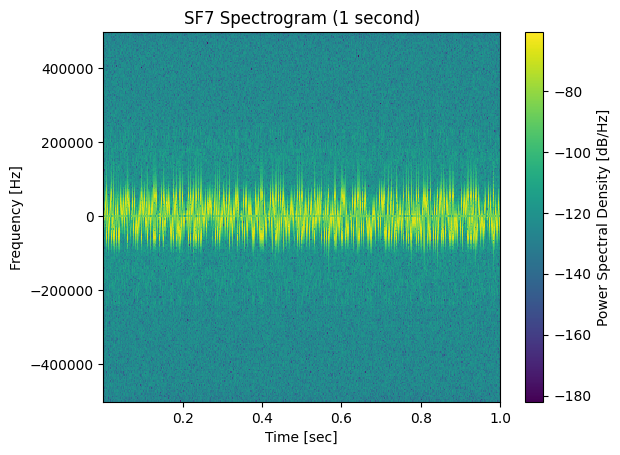

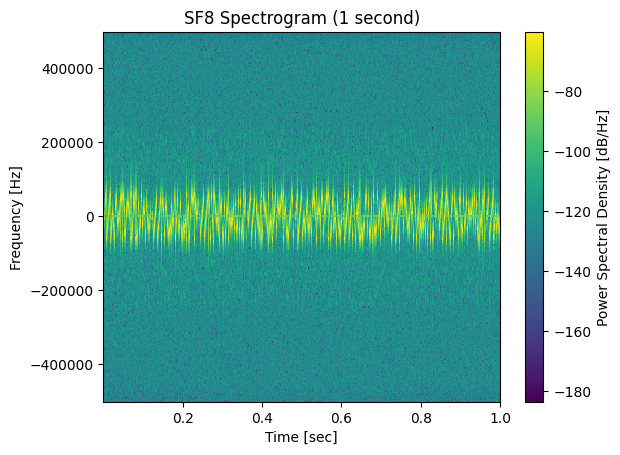

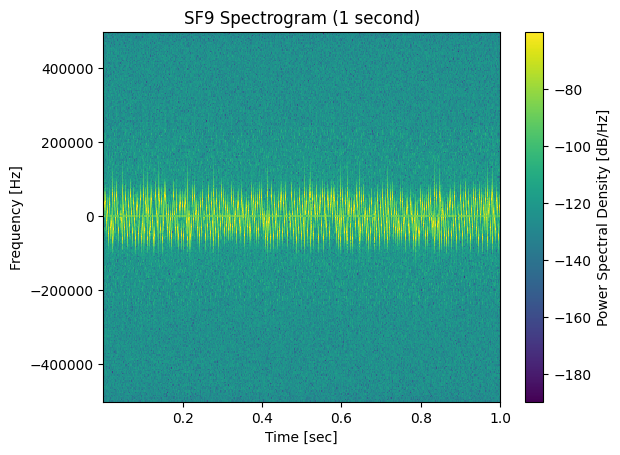

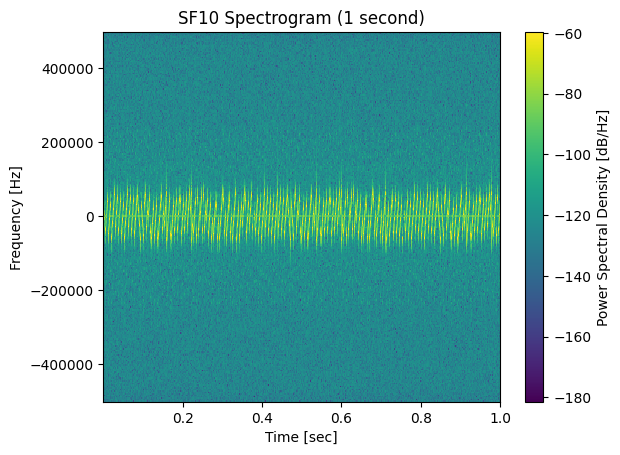

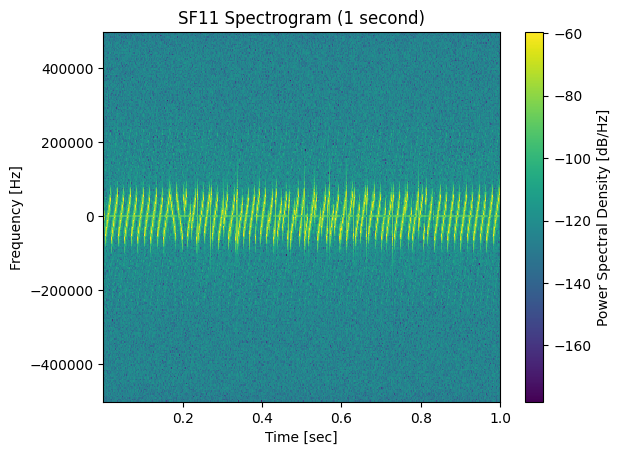

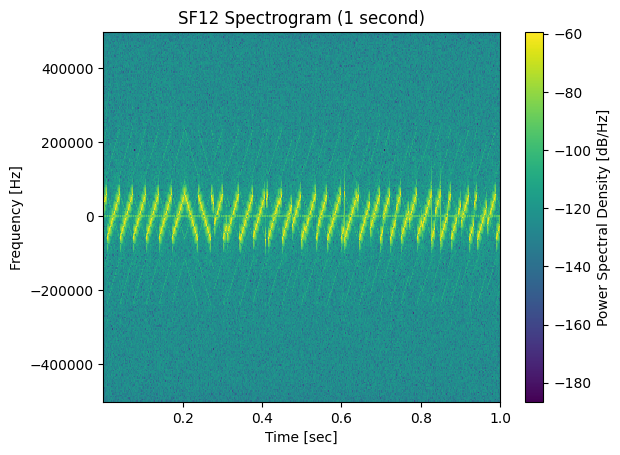

In [ ]:
############# GRAFICAR ESPECTROGRAMA #####################
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import spectrogram

# Definir funciones necesarias
def plot_spectrogram(signal, sf, title):
    f, t, Sxx = spectrogram(signal[:, 0] + 1j * signal[:, 1], fs=sf, nperseg=256, noverlap=128)
    t_one_second = np.where(t <= 1)[0]  # Obtener índices hasta 1 segundo
    # Aplicar fftshift para centrar la representación del espectrograma
    Sxx_shifted = np.fft.fftshift(Sxx, axes=0)
    f_shifted = np.fft.fftshift(f)
    plt.pcolormesh(t[t_one_second], f_shifted, 10 * np.log10(Sxx_shifted[:, t_one_second]))
    plt.title(title)
    plt.ylabel('Frequency [Hz]')
    plt.xlabel('Time [sec]')
    plt.colorbar(label='Power Spectral Density [dB/Hz]')
    plt.show()

# Definir la frecuencia de muestreo
sf = 1e6  # Frecuencia de muestreo inversa del paso de tiempo

# Señales a procesar
signals = [loaded_signal_samples_SF7, loaded_signal_samples_SF8, loaded_signal_samples_SF9,
           loaded_signal_samples_SF10, loaded_signal_samples_SF11, loaded_signal_samples_SF12]

# Graficar espectrograma de un segundo para cada señal
for i, signal in enumerate(signals, start=7):
    title = f"SF{i} Spectrogram (1 second)"
    plot_spectrogram(signal, sf, title)


# **OBTENER BLOQUES DE 2x128 (256, 512, 1024)**

**Truncar y rellenar las matrices para que tengan el mismo tamaño todas.**

Tamaño de referencia: loaded_signal_samples_SF11.shape (28250736, 2)


*   Matriz de dimensión menor: rellenar (mismos valores)
*   Matriz de dimensión mayor: truncar



In [ ]:
import numpy as np

def truncar_y_rellenar(matriz, nuevo_tamano):

    filas_originales = matriz.shape[0]

    # Calculamos la cantidad de filas a agregar
    filas_a_agregar = nuevo_tamano - filas_originales

    # Si la matriz es más chica que el nuevo tamaño
    if filas_a_agregar > 0:

        # Creamos una matriz vacía con el tamaño deseado
        matriz_truncada = np.zeros((nuevo_tamano, matriz.shape[1]))

        # Copiamos los valores originales
        matriz_truncada[:filas_originales, :] = matriz

        # Replicamos filas para rellenar
        filas_faltantes = matriz_truncada[filas_originales:, :]
        for i in range(filas_a_agregar):
            fila_replica = matriz[i % filas_originales, :]
            filas_faltantes[i, :] = fila_replica

    else:
        # Si la matriz es más grande, simplemente truncamos
        matriz_truncada = matriz[:nuevo_tamano, :]

    return matriz_truncada
# Establecer el nuevo tamaño deseado
nuevo_tamano_deseado = loaded_signal_samples_SF11.shape[0]

# Truncar y rellenar cada matriz al nuevo tamaño
t_loaded_signal_samples_SF7 = truncar_y_rellenar(loaded_signal_samples_SF7, nuevo_tamano_deseado)
t_loaded_signal_samples_SF8 = truncar_y_rellenar(loaded_signal_samples_SF8, nuevo_tamano_deseado)
t_loaded_signal_samples_SF9 = truncar_y_rellenar(loaded_signal_samples_SF9, nuevo_tamano_deseado)
t_loaded_signal_samples_SF10 = truncar_y_rellenar(loaded_signal_samples_SF10, nuevo_tamano_deseado)
t_loaded_signal_samples_SF11 = truncar_y_rellenar(loaded_signal_samples_SF11, nuevo_tamano_deseado)
t_loaded_signal_samples_SF12 = truncar_y_rellenar(loaded_signal_samples_SF12, nuevo_tamano_deseado)

En este instante, todas las matrices tiene las mismas dimensiones

In [ ]:
#Obtener las dimensiones de cada array
print(t_loaded_signal_samples_SF7.shape)
print(t_loaded_signal_samples_SF8.shape)
print(t_loaded_signal_samples_SF9.shape)
print(t_loaded_signal_samples_SF10.shape)
print(t_loaded_signal_samples_SF11.shape)
print(t_loaded_signal_samples_SF12.shape)

(28250736, 2)
(28250736, 2)
(28250736, 2)
(28250736, 2)
(28250736, 2)
(28250736, 2)


Descomentar y ejecutar este código SOLO en caso de que se requiera truncar todas las matrices al tamaño de la menor (SF7).

In [ ]:
#truncar todas las matrices al tamaño de la menor
#t_loaded_signal_samples_SF7 = loaded_signal_samples_SF7[:3928750, :]
#t_loaded_signal_samples_SF8 = loaded_signal_samples_SF8[:3928750, :]
#t_loaded_signal_samples_SF9 = loaded_signal_samples_SF9[:3928750, :]
#t_loaded_signal_samples_SF10 = loaded_signal_samples_SF10[:3928750, :]
#t_loaded_signal_samples_SF11 = loaded_signal_samples_SF11[:3928750, :]
#t_loaded_signal_samples_SF12 = loaded_signal_samples_SF12[:3928750, :]

La siguiente función consiste en generar bloques a partir de la matriz obtenida, recibe como parámetros:


*   Matriz
*   Tamaño en columnas del bloque (2, n_columnas)

Retorna como resultado un array 3D que contiene todos los bloques, según el tamaño especificado.



In [ ]:
# Función para dividir en bloques (sin relleno de ceros, array 3D)

def divide_bloques(signal, blocksize=1024):
    num_muestras = signal.shape[1]
    num_blocks = num_muestras // blocksize

    blocks = np.zeros((num_blocks, 2, blocksize), dtype=np.float32)

    for i in range(num_blocks):
        start = i * blocksize
        end = start + blocksize
        block = signal[:, start:end]
        blocks[i, :, :] = block

    return blocks

Se llama a la función anterior, colocando como argumentos:


*   La matriz transpuesta de la señal (para hacer que sean de dos filas, y las n_columnas que tiene cada matriz).
*   El otro argumento ya está implícito en la función, por lo que no se lo coloca.



In [ ]:
# Generar bloques SF7
iq_blocks_SF7 = divide_bloques(np.transpose(t_loaded_signal_samples_SF7))
print(f"Número de bloques: {len(iq_blocks_SF7)}")
print(iq_blocks_SF7[:2])

Número de bloques: 27588
[[[-0.0012207  -0.0022583  -0.00054932 ...  0.003479    0.00302124
    0.00241089]
  [-0.00234985 -0.0017395  -0.00250244 ...  0.00985718  0.0093689
    0.00875854]]

 [[ 0.00338745  0.00405884  0.00476074 ...  0.04263306  0.04199219
    0.04187012]
  [ 0.00878906  0.00814819  0.00842285 ... -0.00668335 -0.00784302
   -0.00830078]]]


In [ ]:
# Generar bloques SF8
iq_blocks_SF8 = divide_bloques(np.transpose(t_loaded_signal_samples_SF8))
print(f"Número de bloques: {len(iq_blocks_SF8)}")
print(iq_blocks_SF8[:2])

Número de bloques: 27588
[[[-0.00210571 -0.00216675 -0.00231934 ...  0.00918579  0.00881958
    0.00961304]
  [-0.00137329 -0.00137329 -0.00115967 ... -0.00408936 -0.00372314
   -0.00439453]]

 [[ 0.00823975  0.00891113  0.00912476 ... -0.01235962 -0.0133667
   -0.01263428]
  [-0.00515747 -0.00311279 -0.00436401 ... -0.04086304 -0.04327393
   -0.04168701]]]


In [ ]:
# Generar bloques SF9
iq_blocks_SF9 = divide_bloques(np.transpose(t_loaded_signal_samples_SF9))
print(f"Número de bloques: {len(iq_blocks_SF9)}")
print(iq_blocks_SF9[:2])

Número de bloques: 27588
[[[ 0.00082397 -0.02182007 -0.0413208  ... -0.0612793  -0.05612183
   -0.05029297]
  [-0.0680542  -0.06591797 -0.0557251  ...  0.03012085  0.03863525
    0.04541016]]

 [[-0.04391479 -0.03778076 -0.03039551 ...  0.06359863  0.06512451
    0.06549072]
  [ 0.05096436  0.05654907  0.06097412 ... -0.02441406 -0.01989746
   -0.01498413]]]


In [ ]:
# Generar bloques SF10
iq_blocks_SF10 = divide_bloques(np.transpose(t_loaded_signal_samples_SF10))
print(f"Número de bloques: {len(iq_blocks_SF10)}")
print(iq_blocks_SF10[:2])

Número de bloques: 27588
[[[-1.8310547e-03  3.2958984e-03  3.3874512e-03 ...  9.0637207e-03
    8.9416504e-03  9.8571777e-03]
  [-1.7395020e-03  1.3427734e-03  2.4108887e-03 ... -3.3569336e-04
    3.0517578e-04 -8.2397461e-04]]

 [[ 9.3383789e-03  9.5520020e-03  1.0650635e-02 ...  5.2795410e-03
    3.9672852e-03  2.6550293e-03]
  [ 3.0517578e-05 -3.0517578e-05 -1.1596680e-03 ... -4.3365479e-02
   -4.3151855e-02 -4.3426514e-02]]]


In [ ]:
# Generar bloques SF11
iq_blocks_SF11 = divide_bloques(np.transpose(t_loaded_signal_samples_SF11))
print(f"Número de bloques: {len(iq_blocks_SF11)}")
print(iq_blocks_SF11[:2])

Número de bloques: 27588
[[[-2.5329590e-03 -2.1057129e-03 -1.2817383e-03 ... -6.1035156e-04
   -3.9672852e-04 -6.4086914e-04]
  [-2.1362305e-04 -1.8310547e-03 -2.1667480e-03 ...  9.6435547e-03
    9.6435547e-03  9.2468262e-03]]

 [[ 9.4604492e-04 -3.3569336e-04  3.0517578e-05 ...  4.2236328e-02
    4.1229248e-02  4.2510986e-02]
  [ 1.0009766e-02  1.0040283e-02  9.8571777e-03 ...  9.4909668e-03
    1.0559082e-02  1.0711670e-02]]]


In [ ]:
# Generar bloques SF12
iq_blocks_SF12 = divide_bloques(np.transpose(t_loaded_signal_samples_SF12))
print(f"Número de bloques: {len(iq_blocks_SF12)}")
print(iq_blocks_SF12[:2])

Número de bloques: 27588
[[[-0.06021118 -0.06524658 -0.06863403 ...  0.0630188   0.05532837
    0.04553223]
  [ 0.03381348  0.02182007  0.00994873 ...  0.03015137  0.04269409
    0.05282593]]

 [[ 0.03387451  0.02108765  0.00747681 ...  0.02175903  0.0368042
    0.04940796]
  [ 0.06143188  0.06637573  0.0692749  ... -0.06530762 -0.05895996
   -0.04751587]]]


## **GENERAR ARCHIVO PKL**

Ya con los bloques generados, se procede a generar un archivo PKL que contendrá estos grupos de señal para cada SF. Para ello, se crea un diccionario en donde:


*   Las claves son un array de dos columnas que contiene la Etiqueta y el valor SNR
*   Los valores correspondientes a las claves son los arrays 3D que contienen los bloques de cada SF.

Luego, se crea el archivo PKL al cual se le inserta (a través de la función dump()) el diccionario especificado.

NOTA: La librería Pickle debe ser llamada antes de realizar este proceso.



In [ ]:
import pickle

In [ ]:
iq_blocks_SF = {
    (b'SF07', 38): iq_blocks_SF7,
    (b'SF08', 38): iq_blocks_SF8,
    (b'SF09', 38): iq_blocks_SF9,
    (b'SF10', 38): iq_blocks_SF10,
    (b'SF11', 38): iq_blocks_SF11,
    (b'SF12', 38): iq_blocks_SF12
};
"""iq_blocks_SF = {
    (b'SF07', 38): iq_blocks_SF12,
    (b'SF08', 38): iq_blocks_SF7,
    (b'SF09', 38): iq_blocks_SF11,
    (b'SF10', 38): iq_blocks_SF8,
    (b'SF11', 38): iq_blocks_SF10,
    (b'SF12', 38): iq_blocks_SF9
};"""
with open('/content/drive/MyDrive/Datasets/LoRa/dataset2-1024-sf7-al-12.pkl', 'wb') as file:
  # Pickle the object and write it to the file
  pickle.dump(iq_blocks_SF, file);

print(iq_blocks_SF[(b'SF11', 38)])

[[[-1.8310547e-03  3.2958984e-03  3.3874512e-03 ...  9.0637207e-03
    8.9416504e-03  9.8571777e-03]
  [-1.7395020e-03  1.3427734e-03  2.4108887e-03 ... -3.3569336e-04
    3.0517578e-04 -8.2397461e-04]]

 [[ 9.3383789e-03  9.5520020e-03  1.0650635e-02 ...  5.2795410e-03
    3.9672852e-03  2.6550293e-03]
  [ 3.0517578e-05 -3.0517578e-05 -1.1596680e-03 ... -4.3365479e-02
   -4.3151855e-02 -4.3426514e-02]]

 [[ 3.1433105e-03  3.3874512e-03  3.2348633e-03 ... -6.5429688e-02
   -6.5582275e-02 -6.4849854e-02]
  [-4.3884277e-02 -4.3457031e-02 -4.4311523e-02 ... -4.5776367e-04
    3.9672852e-04 -9.4604492e-04]]

 ...

 [[-6.7718506e-02 -6.4758301e-02 -5.9082031e-02 ...  2.8137207e-02
    4.5593262e-02  5.9570312e-02]
  [-8.8806152e-03 -2.3132324e-02 -3.5430908e-02 ... -6.3018799e-02
   -5.0140381e-02 -3.3050537e-02]]

 [[ 6.6833496e-02  6.7504883e-02  6.1889648e-02 ... -6.8634033e-02
   -6.5155029e-02 -5.3802490e-02]
  [-1.3305664e-02  1.0070801e-02  2.9785156e-02 ... -5.9509277e-03
    1.9348

## **LEER ARCHIVO PKL**

Como comprobacion adicional, se puede leer este archivo para verificar que se haya estructurado correctamente.

In [ ]:
import pickle
import numpy as np
import codecs

with open('/content/drive/MyDrive/Datasets/LoRa/dataset1-128-3.pkl','rb') as f:
  data = pickle.load(f, encoding='bytes')

print(data)
print(type(data))

{(b'SF07', 38): array([[[-1.2207031e-03, -2.2583008e-03, -5.4931641e-04, ...,
          1.9531250e-03,  2.1972656e-03,  2.4108887e-03],
        [-2.3498535e-03, -1.7395020e-03, -2.5024414e-03, ...,
          2.4719238e-03,  3.1127930e-03,  3.3264160e-03]],

       [[ 2.3498535e-03,  1.8920898e-03,  2.3803711e-03, ...,
          2.8381348e-03,  3.3874512e-03,  3.3264160e-03],
        [ 2.7770996e-03,  1.7700195e-03,  2.0141602e-03, ...,
         -9.1552734e-04, -1.8615723e-03, -4.8828125e-04]],

       [[ 3.5400391e-03,  3.0822754e-03,  2.8076172e-03, ...,
          1.3122559e-03,  9.1552734e-04, -2.4414062e-04],
        [-6.4086914e-04, -1.0375977e-03, -9.1552734e-04, ...,
         -4.7302246e-03, -2.6550293e-03, -2.7160645e-03]],

       ...,

       [[-1.2512207e-03, -1.7395020e-03, -2.1057129e-03, ...,
          6.1035156e-05,  1.1291504e-03,  9.1552734e-05],
        [-4.7302246e-03, -4.1198730e-03, -3.6010742e-03, ...,
          3.6315918e-03,  4.3640137e-03,  2.8686523e-03]],

   